# Uitwerkingen H7: 7.49

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [34]:
puntlasten = np.array([[]])  # [position (m), magnitude (kN)]
koppel = np.array([[]])  # [position (m), magnitude (kNm)]
verdeeldeBelasting = np.array([[]])  # [start position (m), end position (m), magnitude (kN/m)]

#moments = np.array([[]])  # [position (m), magnitude (kNm)]

In [35]:
lengteBalk = 10.0     # lengte van de balk [m]
A = 2         # positie oplegging A (rol) [m]
B = 8        # positie oplegging B (scharnier) [m]

#puntlasten = np.array([ [2, 0, -50],[8, 0, -50] ])  # [position (m), magnitude (kN)]
#koppel = np.array([[5, 50]])  # [position (m), magnitude (kNm)]
verdeeldeBelasting = np.array([[2, 8, -5]])  # [start position (m), end position (m), magnitude (kN/m)]


In [36]:
divs = 10000  # aantal deelstukken voor de balk
dx = lengteBalk / divs  # lengte van een deelstuk [m]
X = np.arange(0, lengteBalk + 2*dx, dx)  # x-coordinaten van de deelstukken [m]
nPL = len(puntlasten[0])  # aantal puntlasten
nPM = len(koppel[0])  # aantal puntmomenten
nVB = len(verdeeldeBelasting[0])  # aantal verdeelde lasten

reactieKrachten = np.array([0,0,0])  # [Va (kN), Ha (kN), Vb (kN)]
shearForce = np.empty([0,len(X)])  # schuifkracht langs de balk [kN]
bendingMoment = np.empty([0,len(X)])  # buigend moment langs de balk [k


In [37]:
def reactie_PL(n):
    xp = puntlasten[n,0]
    fx = puntlasten[n,1]
    fy = puntlasten[n,2]

    la_p = A - xp
    mp = fy * la_p
    la_vb = B - A

    Vb = mp / la_vb
    Va = -fy - Vb
    Ha = -fx

    return Va, Vb, Ha


In [38]:
def reactie_PM(n):
    xm = koppel[n,0]
    m = koppel[n,1]

    la_vb = B - A

    Vb = m / la_vb
    Va = - Vb

    return Va, Vb

In [39]:
def reactie_VB(n):
    xStart = verdeeldeBelasting[n,0]
    xEnd = verdeeldeBelasting[n,1]
    fy = verdeeldeBelasting[n,2]

    fy_Res = fy * (xEnd - xStart)  # resulterende kracht van de UDL
    x_Res = xStart + 0.5 * (xEnd - xStart)  # positie van de resulterende kracht van de UDL    

    la_p = A - x_Res
    mp = fy_Res * la_p
    la_vb = B - A

    Vb = mp / la_vb
    Va = - fy_Res - Vb

    return Va, Vb

In [40]:
print(nPL)

PL_record = np.empty([0,3])  # [Va (kN), Vb (kN), Ha (kN)]
if (nPL > 0):

    for n, p in enumerate(puntlasten):
        va, vb, ha = reactie_PL(n)
        PL_record = np.append(PL_record, [np.array([va, ha, vb])], axis=0)

        reactieKrachten[0] += va
        reactieKrachten[1] += ha
        reactieKrachten[2] += vb


0


In [41]:
PM_record = np.empty([0,2])  # [Va (kN), Vb (kN), Ha (kN)]
if (nPM > 0):
    for n, p in enumerate(koppel):
        va, vb = reactie_PM(n)
        PM_record = np.append(PM_record, [np.array([va, vb])], axis=0)

        reactieKrachten[0] += va
        #reactieKrachten[1] += ha
        reactieKrachten[2] += vb

In [42]:
VB_record = np.empty([0,2])  # [Va (kN), Vb (kN), Ha (kN)]
if (nVB > 0):
    for n, p in enumerate(verdeeldeBelasting):
        va, vb = reactie_VB(n)
        VB_record = np.append(VB_record, [np.array([va, vb])], axis=0)

        reactieKrachten[0] += va
        #reactieKrachten[1] += ha
        reactieKrachten[2] += vb

In [43]:
def shear_moment_PL(n):
    xp = puntlasten[n,0]
    #fx = puntlasten[n,1]
    fy = puntlasten[n,2]
    Va = PL_record[n,0]
    Vb = PL_record[n,2]

    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))

    for i, x in enumerate(X):
        shear = 0
        moment = 0

        if x > A:
            shear = shear + Va
            moment = moment + Va * (x - A)

        if x > xp:
            shear = shear + fy
            moment = moment + fy * (x - xp)

        if x > B:
            shear = shear + Vb
            moment = moment + Vb * (x - B)

        Shear[i] = shear
        Moment[i] = moment

    return Shear, Moment

In [44]:
def shear_moment_PM(n):
    xm = koppel[n,0]
    m = koppel[n,1]
    Va = PM_record[n,0]
    Vb = PM_record[n,1]

    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))

    for i, x in enumerate(X):
        shear = 0
        moment = 0

        if x > A:
            shear = shear + Va
            moment = moment + Va * (x - A)

        if x > xm:
            moment = moment + m

        if x > B:
            shear = shear + Vb
            moment = moment + Vb * (x - B)

        Shear[i] = shear
        Moment[i] = moment

    return Shear, Moment

In [45]:
def shear_moment_UDL(n):
    xStart = verdeeldeBelasting[n,0]
    xEnd = verdeeldeBelasting[n,1]
    fy = verdeeldeBelasting[n,2]
    Va = VB_record[n,0]
    Vb = VB_record[n,1]

    Shear = np.zeros(len(X))
    Moment = np.zeros(len(X))

    for i, x in enumerate(X):
        shear = 0
        moment = 0

        if x > A:
            shear = shear + Va
            moment = moment + Va * (x - A)

        if x > xStart and x <= xEnd :
            shear = shear + fy * (x - xStart)
            moment = moment + fy * (x - xStart) * 0.5 * (x - xStart)
        elif( x > xEnd ):
            shear = shear + fy * (xEnd - xStart)
            moment = moment + fy * (xEnd - xStart) * 0.5 * (xEnd - xStart)

        if x > B:
            shear = shear + Vb
            moment = moment + Vb * (x - B)

        Shear[i] = shear
        Moment[i] = moment

    return Shear, Moment

In [46]:
if (nPL > 0):
    for n, p in enumerate(puntlasten):
        Shear, Moment = shear_moment_PL(n)
        shearForce = np.append(shearForce, [Shear], axis=0)
        bendingMoment = np.append(bendingMoment, [Moment], axis=0)


In [47]:
if (nPM > 0):
    for n, p in enumerate(koppel):
        Shear, Moment = shear_moment_PM(n)
        shearForce = np.append(shearForce, [Shear], axis=0)
        bendingMoment = np.append(bendingMoment, [Moment], axis=0)


In [48]:
if (nVB > 0):
    for n, p in enumerate(verdeeldeBelasting):
        Shear, Moment = shear_moment_UDL(n)
        shearForce = np.append(shearForce, [Shear], axis=0)
        bendingMoment = np.append(bendingMoment, [Moment], axis=0)


In [49]:
print ("De verticale reactiekrachten in A is {one} kN".format(one= round(reactieKrachten[0],2) ))
print ("De verticale reactiekrachten in B is {one} kN".format(one= round(reactieKrachten[2],2) ))

De verticale reactiekrachten in A is 15 kN
De verticale reactiekrachten in B is 15 kN


In [50]:
import plotly as py
import plotly.graph_objects as go


In [51]:
layout = go.Layout(
    title="Dwarskracht diagram",
    xaxis=dict(title="Lengte balk (m)", range=[-1, lengteBalk+1]),
    yaxis=dict(title="Dwarskracht (kN)"),
    showlegend=False
)

line = go.Scatter(
    x=X,
    y= sum(shearForce),
    mode='lines',
    name='Dwarskracht (kN)',
    fill = 'tonexty',
    line_color='green',
    fillcolor='rgba(0,255,0,0.1)'
)

axis = go.Scatter(
    x= [0,lengteBalk],
    y= [0,0],
    mode='lines',
    line_color='black'
)

fig= go.Figure(data=[line, axis], layout=layout)
fig.show()

In [52]:
layout = go.Layout(
    title="Buigmoment diagram",
    xaxis=dict(title="Lengte balk (m)", range=[-1, lengteBalk+1]),
    yaxis=dict(title="Buigmoment (kNm)"),
    showlegend=False
)

line = go.Scatter(
    x=X,
    y= sum(bendingMoment),
    mode='lines',
    name='Buigmoment (kNm)',
    fill = 'tonexty',
    line_color='red',
    fillcolor='rgba(255,0,0,0.1)'
)

axis = go.Scatter(
    x= [0,lengteBalk],
    y= [0,0],
    mode='lines',
    line_color='black'
)

fig= go.Figure(data=[line, axis], layout=layout)
fig.show()

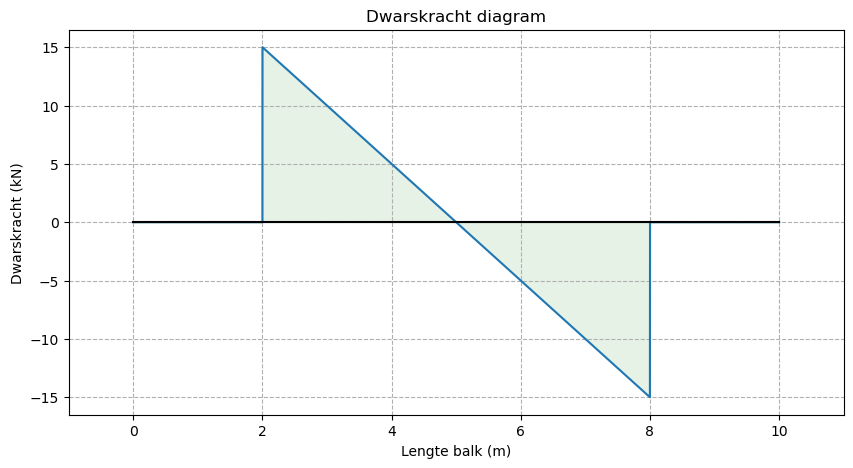

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Maak een nieuwe figuur
plt.figure(figsize=(10, 5))

# Dwarsekrachtlijn tekenen
plt.plot(X, np.sum(shearForce, axis=0), label="Dwarskracht (kN)")

# Opvullen onder de lijn
plt.fill_between(X, np.sum(shearForce, axis=0), color='green', alpha=0.1)

# Horizontale as alleen van x = 0 tot x = lengteBalk
plt.plot([0, lengteBalk], [0, 0], color='black')

# Titels en labels
plt.title("Dwarskracht diagram")
plt.xlabel("Lengte balk (m)")
plt.ylabel("Dwarskracht (kN)")

# x-as bereik zoals in Plotly
plt.xlim(-1, lengteBalk + 1)

# **Grid met stippellijnen**
plt.grid(True, linestyle='--')

plt.show()


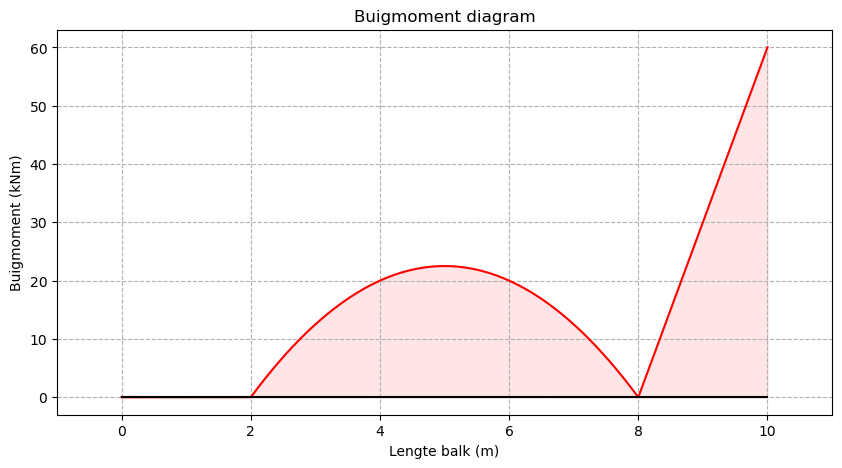

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Buigmomentlijn
plt.plot(X, np.sum(bendingMoment, axis=0), label="Buigmoment (kNm)", color='red')

# Opvullen onder de lijn
plt.fill_between(X, np.sum(bendingMoment, axis=0), color='red', alpha=0.1)

# Horizontale as alleen van 0 tot lengteBalk
plt.plot([0, lengteBalk], [0, 0], color='black')

# Titels en labels
plt.title("Buigmoment diagram")
plt.xlabel("Lengte balk (m)")
plt.ylabel("Buigmoment (kNm)")

# Zelfde x-as bereik als Plotly
plt.xlim(-1, lengteBalk + 1)

# Grid met stippellijnen (consistent met vorige plot)
plt.grid(True, linestyle='--')

plt.show()
